In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Function that plots the distribution of the variables of a DataFrame
# INPUT:
# df: DataFrame with the data
# exclude_columns: list with the variables that are going to be ignored in the analysis. By default it is an empty list
# start_with: list with the starting letters of variables to be included in the analysis. By default it is an empty list
# OUTPUT:
# VARIABLE DISTRIBUTION PLOTS

def plot_variable_distributions(df, exclude_columns=[], start_with=[]):
    columns_to_plot = [col for col in df.columns if col not in exclude_columns and any(col.startswith(prefix) for prefix in start_with)]
    num_columns = len(columns_to_plot)
    num_rows = (num_columns+4)//5
    # Create the subplots
    fig, axs = plt.subplots(num_rows, 5, figsize=(25, 5 * num_rows))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    axs = axs.flatten()
    # iterate over the columns to plot
    for ax, column in zip(axs, columns_to_plot):
        # calculate value counts as percentages
        vc_percent = df[column].value_counts(normalize=True) * 100
        vc_percent.plot(kind='bar', ax=ax, title=column)
        # add percentage labels to each bar
        for p in ax.patches:
            ax.annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')
        ax.set_ylim(0, 100)
    for ax in axs[len(columns_to_plot):]:
        ax.axis('off')
    plt.show()

In [3]:
df=pd.read_csv('DATA.csv')

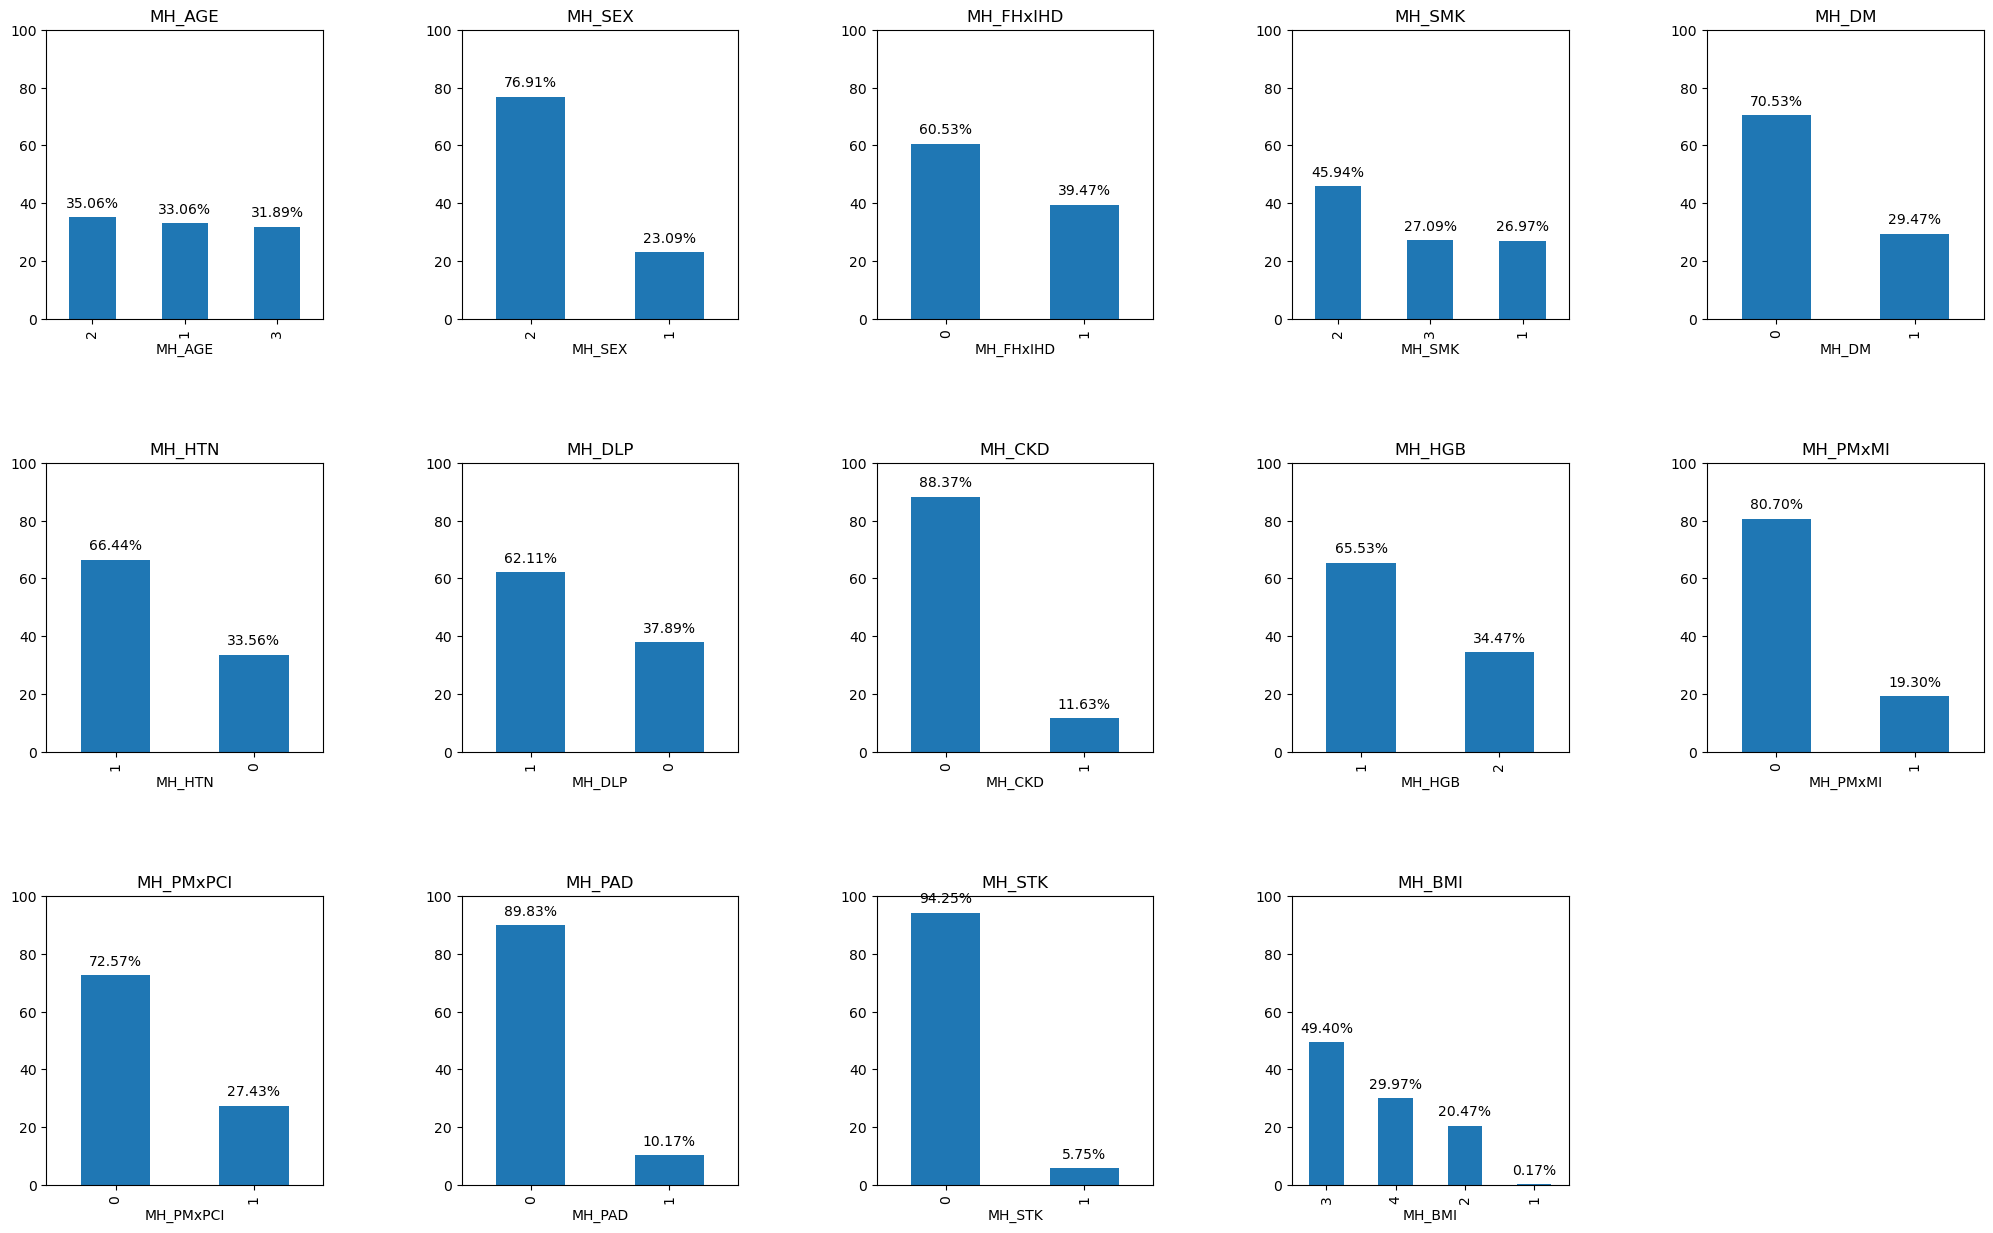

In [4]:
# Plot the distribution of the medical history variables
plot_variable_distributions(df,start_with=['MH'])

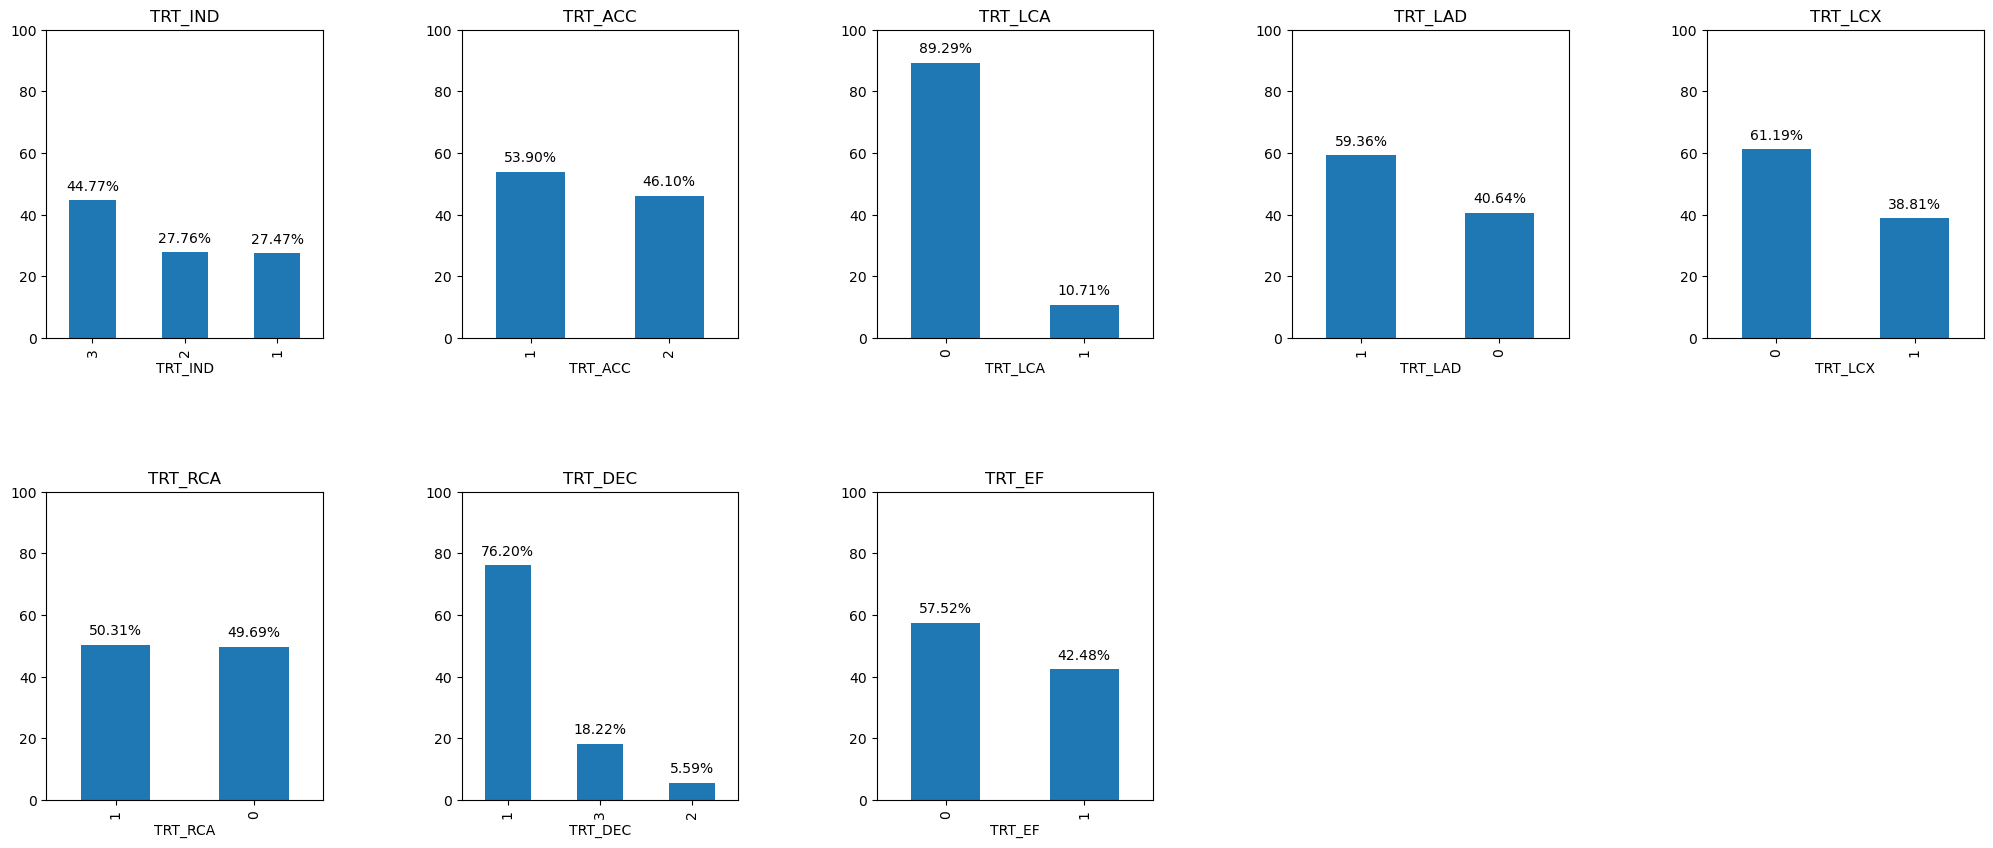

In [5]:
# Plot the distribution of the treatment variables
plot_variable_distributions(df,start_with=['TRT'])

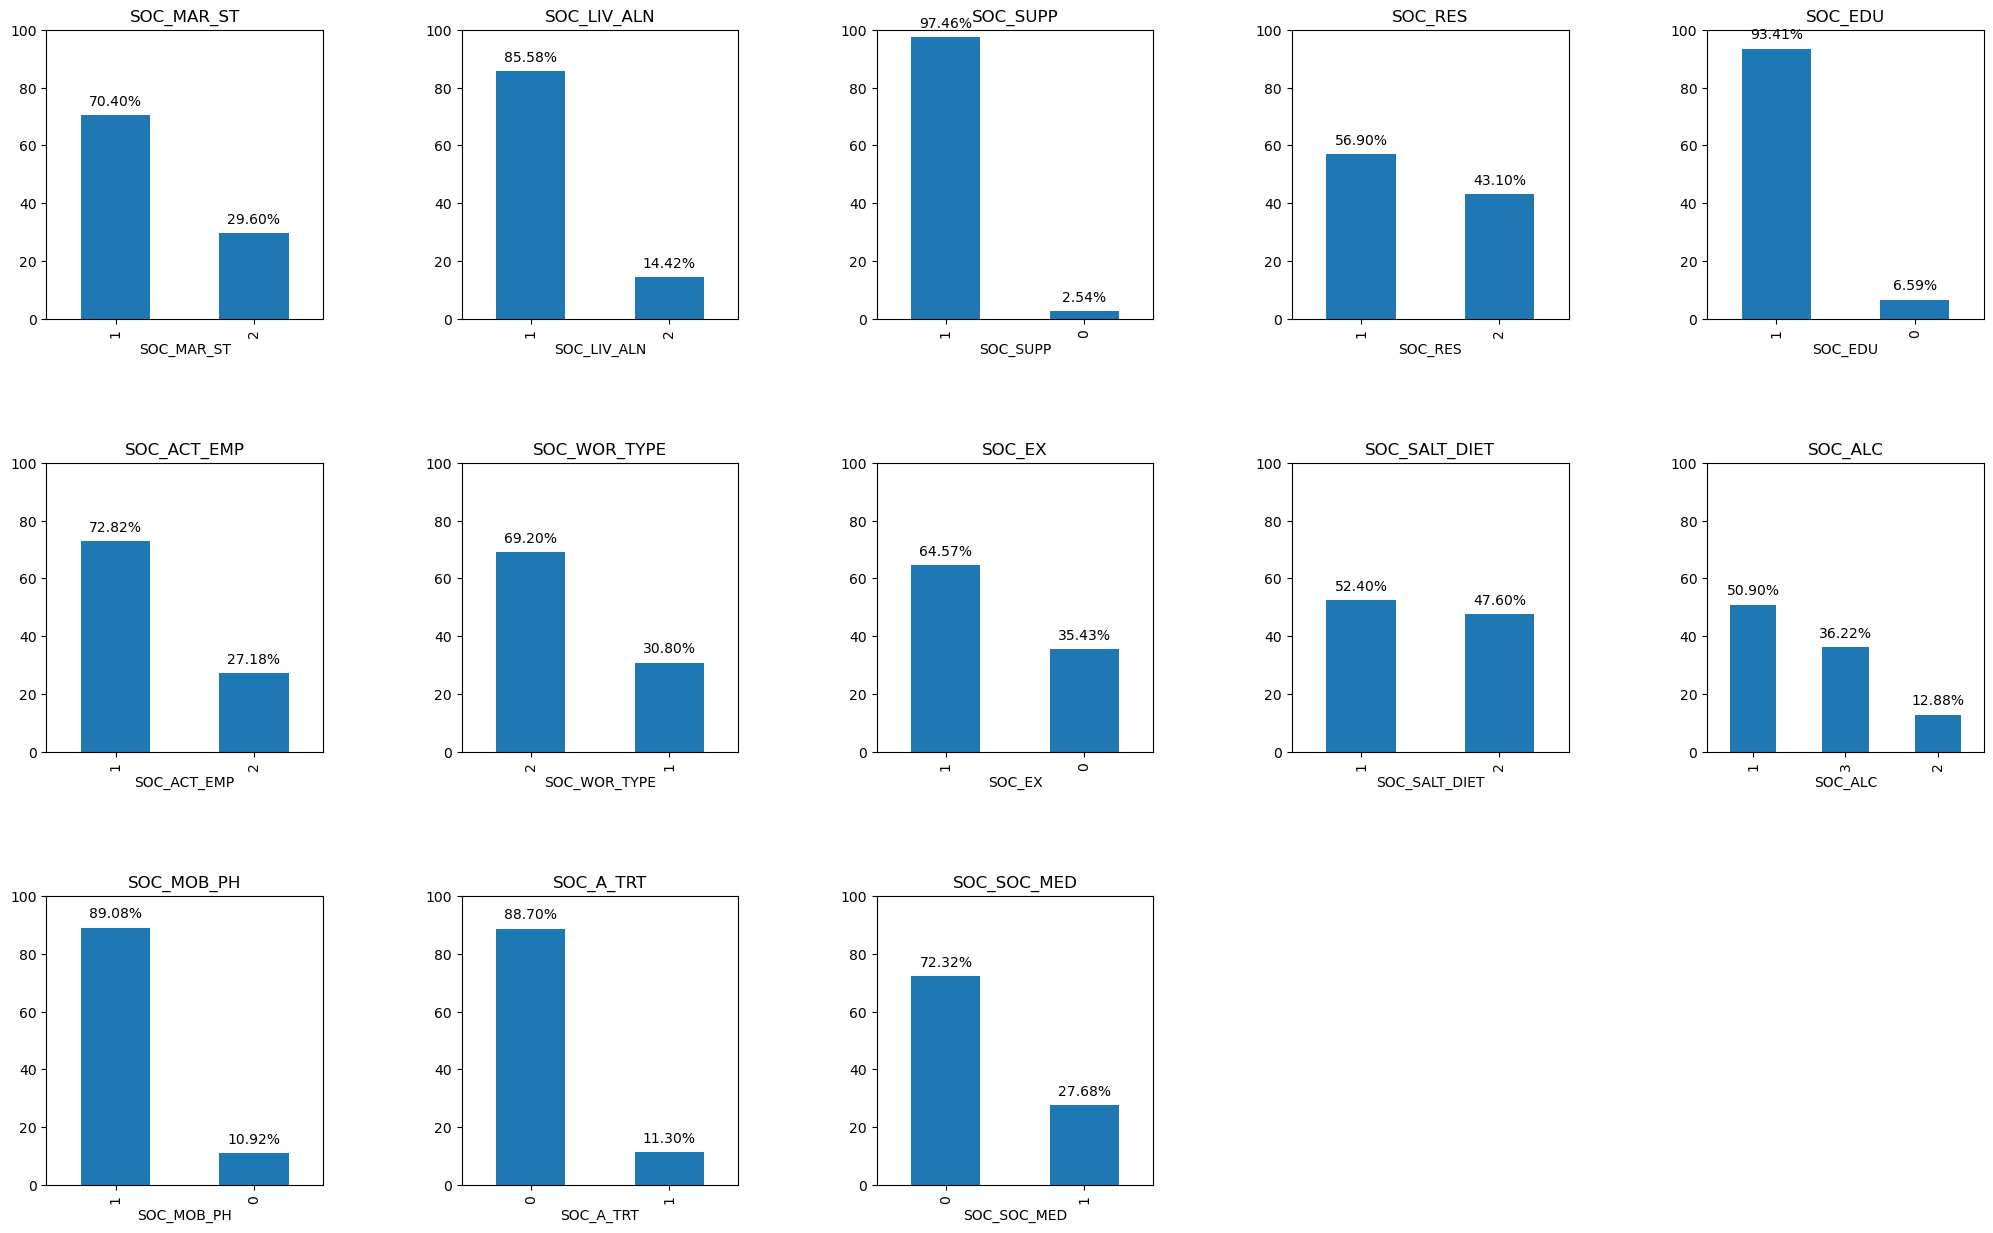

In [6]:
# Plot the distribution of the social variables
plot_variable_distributions(df,start_with=['SOC'])

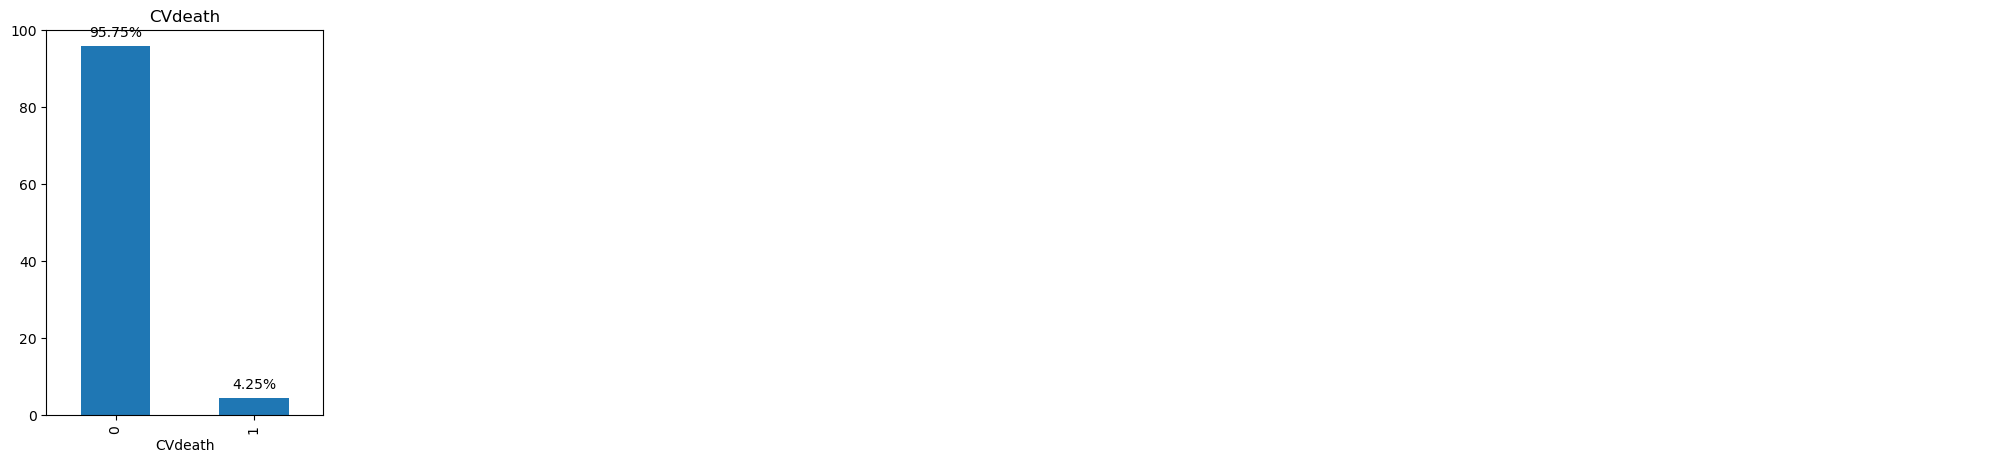

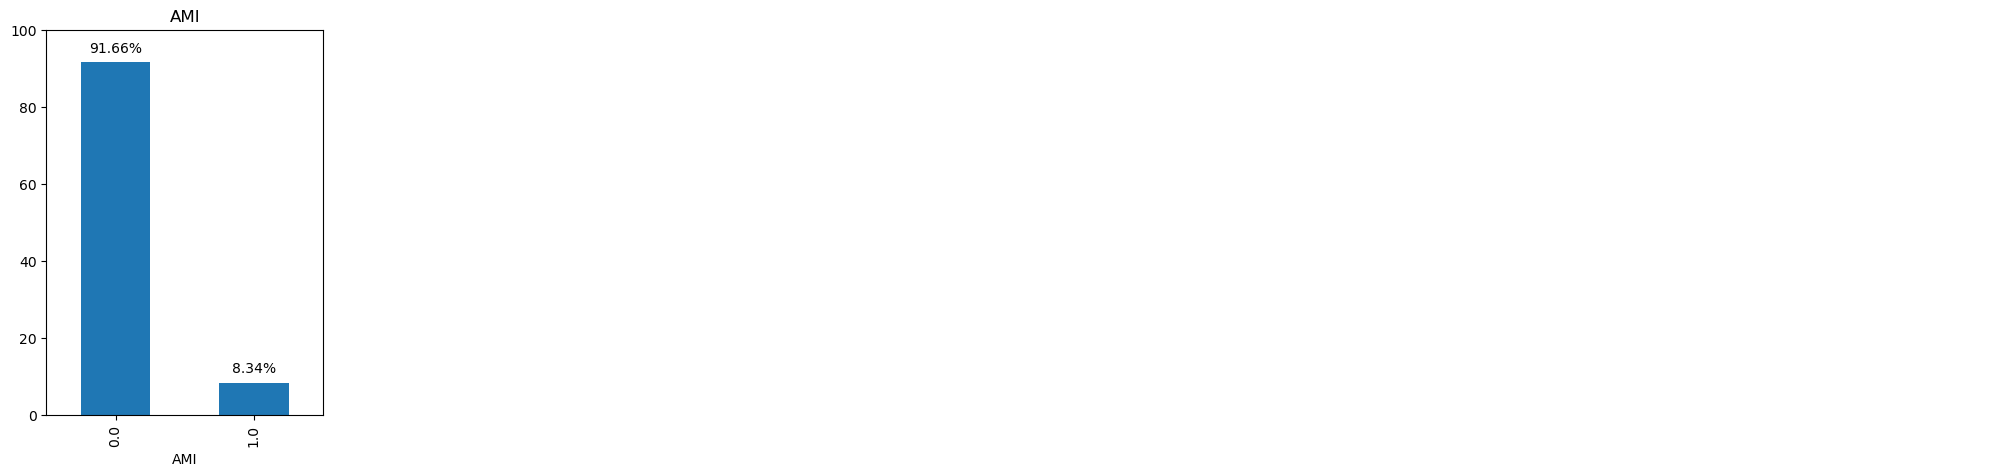

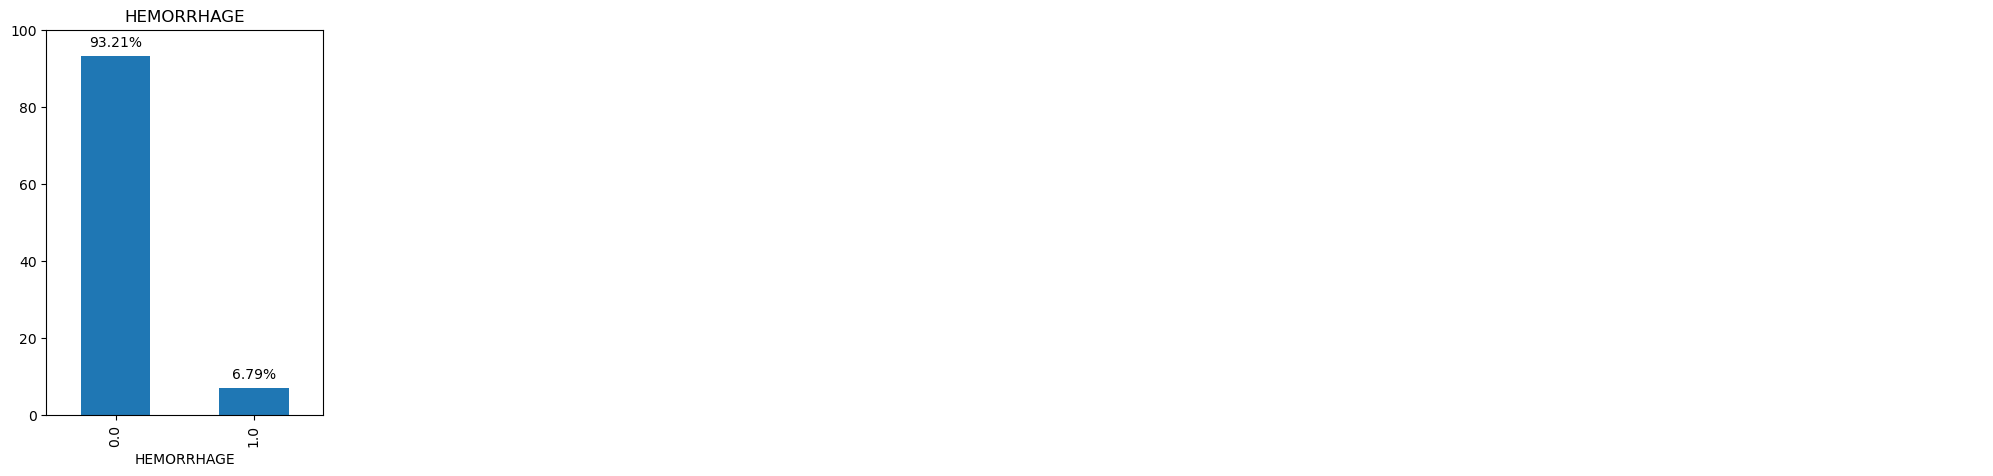

In [7]:
# Plot the distribution of the 3 target variables
plot_variable_distributions(df,start_with=['CVdeath'])
plot_variable_distributions(df,start_with=['AMI'])
plot_variable_distributions(df,start_with=['HEMORRHAGE'])